**import  semua library yang diperlukan untuk analisa data**

In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

url = '/content/kc_house_data.csv'
df = pd.read_csv(url)

**overview data untuk mengetahui bentuk data dan jenis data secara singkat**

In [0]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**mengetahui info dari setiap features, record data, dan type data masing-masing features**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


**PROSES PREPROCESSING**

> karena kita telah mengetahui data dari df.info tidak ada data yang kosong dan model data sudah cukup bagus

> sekarang kita melakukan features selection







> drop id karena feature ini tidak diperlukan dalam proses pemodelan



In [0]:
df.drop('id',axis=1,inplace=True)

begitupun juga dengan date

In [0]:
df.drop('date',axis=1,inplace=True)

**MEMILIH FEATURE YANG MEMILIKI KORELASI**

> proses pemilihan feature sangat penting dalam kecepatan komputasi dan pembentukan pemodelan 





> dalam hal ini kita menggunakan model korelasi 'pearson' terdapat juga 'kendall'



In [0]:
df.corr(method='pearson')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


**Visualisasi korelasi antara features**

> dalam hal ini dependent variabel adalah 'price'



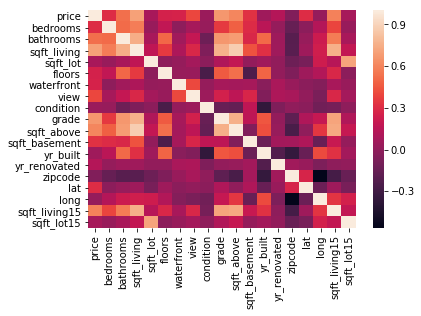

In [0]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr)

**PEMBENTUKAN MODEL**

> algoritma yang digunakan adalah algoritma Regresi Linear Sederhana, karena sesuai bentuk dependent data



**proses pemilihan dependent dan independet variabel**

> setelah melihat hasil korelasi terdapat feature yang memiliki pengaruh kuat terhadap variabel 'proce' yaitu = 'sqft_living','grade','sqft_above','sqft_living15','bathrooms'



In [0]:

topaironly = x = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','price']]


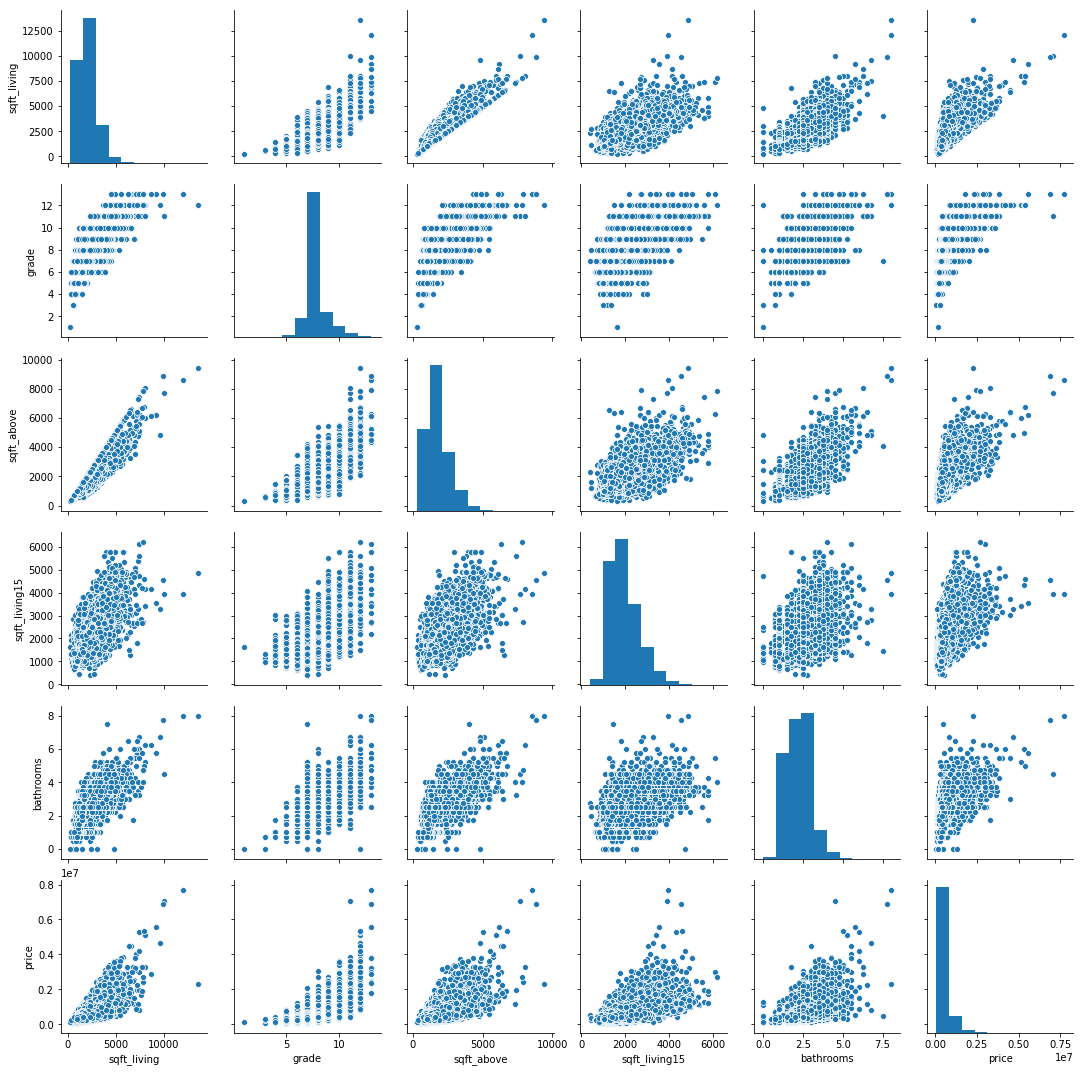

In [0]:
sns.pairplot(topaironly)

In [0]:
x = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']]
y = df['price']

**PEMBENTUKAN MODEL DAN SPLIT DATA MENGGUNAKAN LIBRARY SKLEARN**

In [0]:
from sklearn.linear_model import LinearRegression
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.33)
le = LinearRegression()
model = le.fit(xtrain,ytrain)
ypredict = model.predict(xtest)


**MSE**

In [0]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, ypredict)
np.sqrt(mse)

237319.07641351386

**MAE**

In [0]:
absolut = metrics.mean_absolute_error(ytest, ypredict)
absolut

160313.579994547

**AKURASI DARI MODEL REGRESI YANG DIBUAT**

> hasilnya bisa dilihat dibwah 70%



In [0]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(ytest,ypredict))

Variance score: 0.56
